# Convert Pictures to Numpy

In [1]:
#Create references to important directories we will use over and over
import os, sys
current_dir = os.getcwd()
SCRIPTS_HOME_DIR = current_dir
DATA_HOME_DIR = current_dir+'/data'

In [2]:
from glob import glob
import numpy as np
import _pickle as pickle
import PIL
from PIL import Image

from tqdm import tqdm
from PIL import ImageOps
from PIL import Image

from tqdm import tqdm
import bcolz

## Iterate through pictures in directory
Assuming X_train exists as ordered images  
Y_train is csv file

In [3]:
def folder_to_numpy(data_folder):
    """
    Read sorted pictures (by filename) in a folder to a numpy array
    
    USAGE:
        data_folder = '/train/test1'
        X_train = folder_to_numpy(data_folder)
    
    Args:
        data_folder (str): The relative folder from DATA_HOME_DIR
        
    Returns:
        picture_array (np array): The numpy array in tensorflow format
    """
    # change directory
    image_directory_full = DATA_HOME_DIR + data_folder
    print ("Moving to directory: " + image_directory_full)
    os.chdir(image_directory_full)
    
    # read in filenames from directory
    g = glob('*.png')
    if len(g) == 0:
        g = glob('*.jpg')
    print ("Found {} pictures".format(len(g)))
    
    # sort filenames
    g.sort()
    
    # open and convert images to numpy array
    print("Starting pictures to numpy conversion")
    picture_arrays = np.array([np.array(Image.open(image_path)) for image_path in g])
    
#     reshape to tensorflow format
#     picture_arrays = picture_arrays.reshape(*picture_arrays.shape, 1)
    print ("Shape of output: {}".format(picture_arrays.shape))
    
    # return array
    return picture_arrays.astype('float32')

In [4]:
data_folder = '/train/binary/forward'
X_train = folder_to_numpy(data_folder)

Moving to directory: /home/nathan/olin/spring2017/line-follower/line-follower/src/old_lane_follower_past_project/data/train/binary/forward
Found 754 pictures
Starting pictures to numpy conversion
Shape of output: (754, 16, 32)


In [31]:
Y_train = np.arange(0,754).reshape(754,1)
# Y_train = np.random.rand(X_train.shape[0], 1)
# Y_train = genfromtxt('my_file.csv', delimiter=',')

In [32]:
Y_train.shape

(754, 1)

In [7]:
def save_array(fname, arr):
    c=bcolz.carray(arr, rootdir=fname, mode='w')
    c.flush()

def load_array(fname):
    return bcolz.open(fname)[:]

In [8]:
# save_array('test.bc', X_train)
# X_train = load_array('test.bc')

In [9]:
from keras.preprocessing import image

Using TensorFlow backend.


In [10]:
import seaborn as sns
import matplotlib as plt
%matplotlib inline

In [11]:
def flip3DArray(array):
    return array[..., ::-1] #[:,:,::-1] also works but is 50% slower

In [12]:
X_train_flip = flip3DArray(X_train)

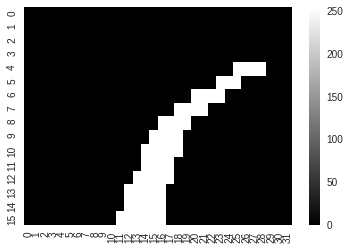

In [13]:
sns.heatmap(X_train[10], cmap='gray')

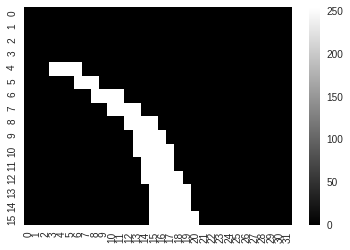

In [14]:
sns.heatmap(X_train_flip[10], cmap='gray')

In [33]:
gen = image.ImageDataGenerator()

In [34]:
train = gen.flow(X_train.reshape(*X_train.shape, 1), Y_train, shuffle=False, batch_size=64)

In [59]:
x, y = train.next()
print(x.shape, y.shape)
print(y)

(64, 16, 32, 1) (64, 1)
[[ 0]
 [ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]
 [11]
 [12]
 [13]
 [14]
 [15]
 [16]
 [17]
 [18]
 [19]
 [20]
 [21]
 [22]
 [23]
 [24]
 [25]
 [26]
 [27]
 [28]
 [29]
 [30]
 [31]
 [32]
 [33]
 [34]
 [35]
 [36]
 [37]
 [38]
 [39]
 [40]
 [41]
 [42]
 [43]
 [44]
 [45]
 [46]
 [47]
 [48]
 [49]
 [50]
 [51]
 [52]
 [53]
 [54]
 [55]
 [56]
 [57]
 [58]
 [59]
 [60]
 [61]
 [62]
 [63]]
